# Welcome to the interactive Galaxy B-cubed impIndicator Jupyter Notebook

You can access your data via the dataset number. Using a Python kernel, you can access dataset number 42 with ``handle = open(get(42), 'r')``.
To save data, write your data to a file, and then call ``put('filename.txt')``. The dataset will then be available in your galaxy history.
<br>When using a non-Python kernel, ``get`` and ``put`` are available as command-line tools, which can be accessed using system calls in R, Julia, and Ruby. For example, to read dataset number 42 into R, you can write ```handle <- file(system('get -i 42', intern = TRUE))```.
To save data in R, write the data to a file and then call ``system('put -p filename.txt')``.
Notebooks can be saved to Galaxy by clicking the large green button at the top right of the IPython interface.<br>
More help and informations can be found on the project [website](https://github.com/bgruening/docker-jupyter-notebook).

In [3]:
system("conda install r-ape=5.8_1 r-rnaturalearth=1.1.0 r-rnaturalearthdata=1.0.0 r-gdalUtilities=1.2.5 r-rotl=3.1.0 r-sf=1.0_20 r-terra=1.8_42 r-units=0.8_7 r-s2=1.1.9")

In [4]:
install.packages("b3gbi", repos = c("https://b-cubed-eu.r-universe.dev", "https://cloud.r-project.org"))

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
install.packages("impIndicator", repos = c("https://b-cubed-eu.r-universe.dev", "https://cloud.r-project.org"))

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done




## Demonstration

We demonstrate the computation and visualisation of impact indicator of
biological invasions using the **impIndicator** package:
`compute_impact_indicator()` to compute impact indicators of alien taxa,
`compute_impact_per_species()` to compute impact indicators per species,
and `compute_impact_per_site()` to compute impact indicators per site.
The functions require (1) a species occurrence cube processed by the
`b3gbi::process_cube()` function within `taxa_cube()`, and (2)
Environmental Impact Classification for Alien Taxa (EICAT) impact score
of species. Go to `vignette("Background", package = "impIndicator")` to
read more about these functions.

In [6]:
# Load packages
library(impIndicator)

library(b3gbi)     # General biodiversity indicators for data cubes
library(ggplot2)   # Visualisation
library(tidyr)     # Data wrangling

### Process occurrence cube

The Global Biodiversity Information Facility (GBIF) occurrence data is a
standardised species dataset that documents the presence or absence of
species at particular locations and time points.

In [7]:
# Process cube from GBIF occurrence data 
acacia_cube <- taxa_cube(
  taxa = taxa_Acacia,
  region = southAfrica_sf,
  first_year = 2010
)

acacia_cube


Simulated data cube for calculating biodiversity indicators

Date Range: 2010 - 2024 
Number of cells: 415 
Grid reference system: custom 
Coordinate range:
     xmin      xmax      ymin      ymax 
 16.60833  31.60833 -34.69700 -22.94701 

Total number of observations: 6728 
Number of species represented: 29 
Number of families represented: Data not present 

Kingdoms represented: Data not present 

First 10 rows of data (use n = to show more):

# A tibble: 6,728 × 8
   scientificName   taxonKey minCoordinateUncerta…¹  year cellCode xcoord ycoord
   <chr>               <dbl>                  <dbl> <dbl> <chr>     <dbl>  <dbl>
 1 Acacia mearnsii   2979775                      8  2010 1376       30.4  -29.7
 2 Acacia saligna    2978552                      1  2010 206        18.4  -33.9
 3 Acacia implexa    2979232                      1  2010 206        18.4  -33.9
 4 Acacia pycnantha  2978604                      1  2010 206        18.4  -33.9
 5 Acacia cyclops    2980425             

### EICAT assessment data

The Environmental Impact Classification for Alien Taxa (EICAT)
assessment data is the reported impact of alien taxa based on EICAT
method which is the International Union for Conservation of Nature
(IUCN) standard. An assessed alien taxa with adequate data is classified
into massive (MV), major (MR), moderate (MO), minor (MN), or minimal
concern (MC) depending on the severity of the impact caused on recipient
ecosystem. Additional information such as the mechanisms and location of
impact are also recorded. An example of an EICAT dataset is:

In [8]:
# View EICAT data
head(eicat_acacia, 10)

scientific_name,impact_category,impact_mechanism
<chr>,<chr>,<chr>
Acacia saligna,MC,(1) Competition
Acacia saligna,MC,(12) Indirect impacts through interaction with other species
Acacia saligna,MC,(1) Competition
Acacia saligna,MC,(1) Competition; (9) Chemical impact on the ecosystem
Acacia mearnsii,MC,(6) Poisoning/toxicity
Acacia longifolia,MC,(9) Chemical impact on ecosystems
Acacia dealbata,MC,(9) Chemical impact on ecosystems
Acacia dealbata,MC,(9) Chemical impact on ecosystems
Acacia saligna,MC,(9) Chemical impact on ecosystems



### Compute impact map

The impact risk map shows the impact score for each site, where multiple
species can be present. To compute the impact risk per site, aggregated
scores across species at each site are needed. The `site_impact()` uses
*max*, *sum* and *mean* metrics to aggregate impact scores across
species as proposed by Boulesnane-Guengant et al., (in preparation). The
combinations of within species aggregation metrics for each species and
across species for each site leads to five methods of calculating an
impact indicator, namely, **precautionary** (precaut), **precautionary
cumulative** (precaut_cum), **mean**, **mean cumulative** (mean_cum) and
**cumulative** (cum).

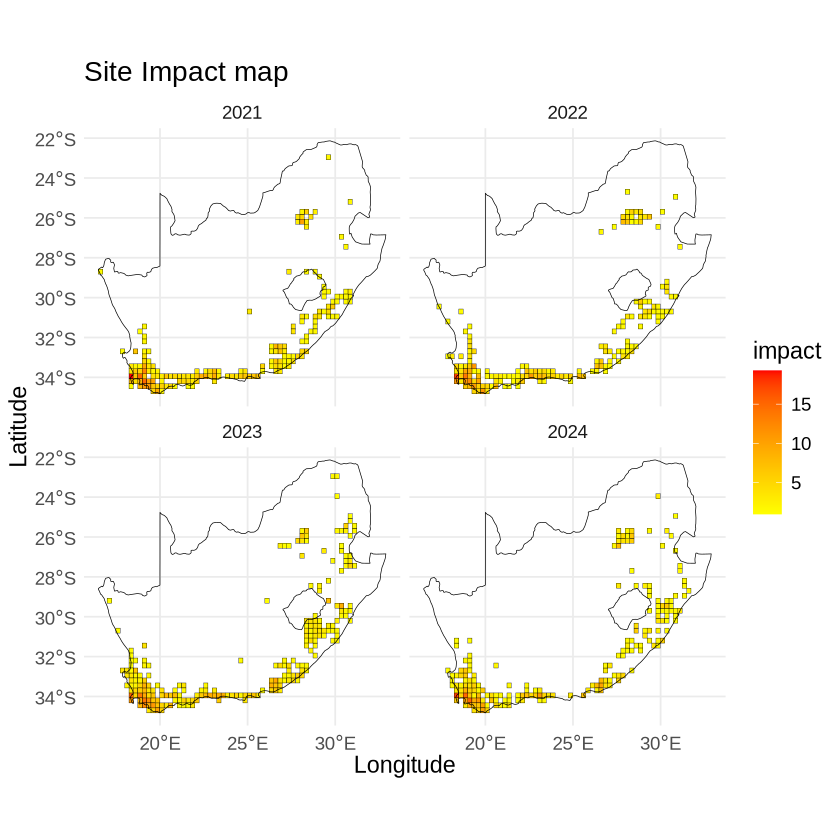

In [9]:
siteImpact <- compute_impact_per_site(
  cube = acacia_cube,
  impact_data = eicat_acacia,
  method = "mean_cum"
)

# Impact map
# Visualise last four years for readability
plot(x = siteImpact, region = southAfrica_sf, first_year = 2021)


### Compute impact indicators

To compute the impact indicator of alien taxa, we sum all the yearly
impact scores of each site of the study region. To correct for sampling
effort we divide the yearly impact scores by number of sites in the
study region with at least a single occurrence throughout the whole
year.

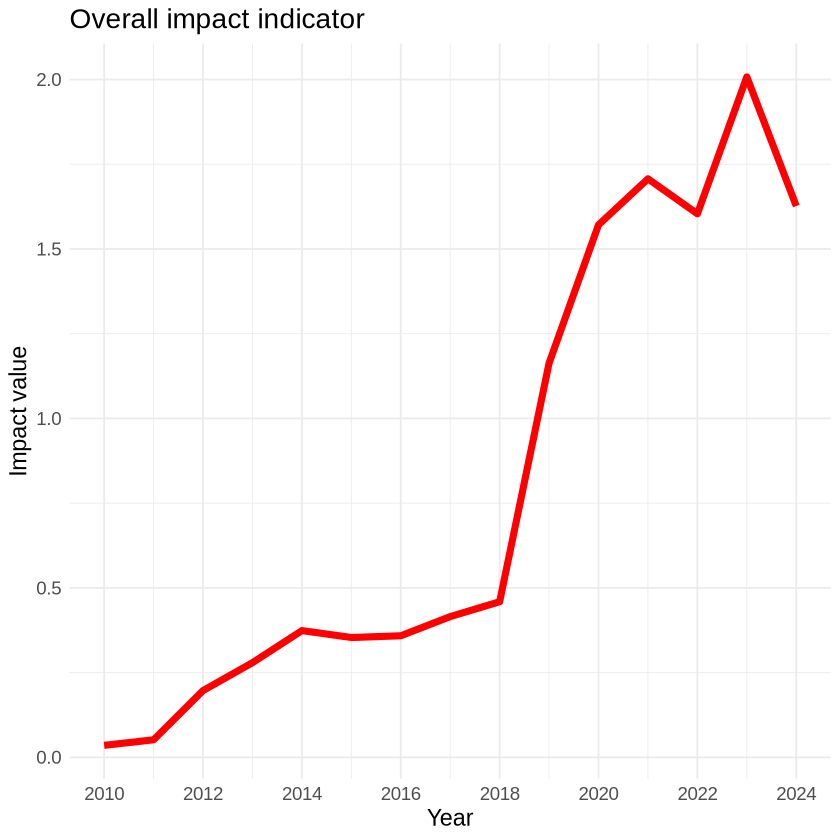

In [10]:
# Impact indicator
impactIndicator <- compute_impact_indicator(
  cube = acacia_cube,
  impact_data = eicat_acacia,
  method = "mean_cum"
)

# Visualise impact indicator
plot(impactIndicator)

### Impact indicator per species

We compute the impact indicator per species by summing the impact risk
map per species and correct for sampling effort by dividing by $N$.

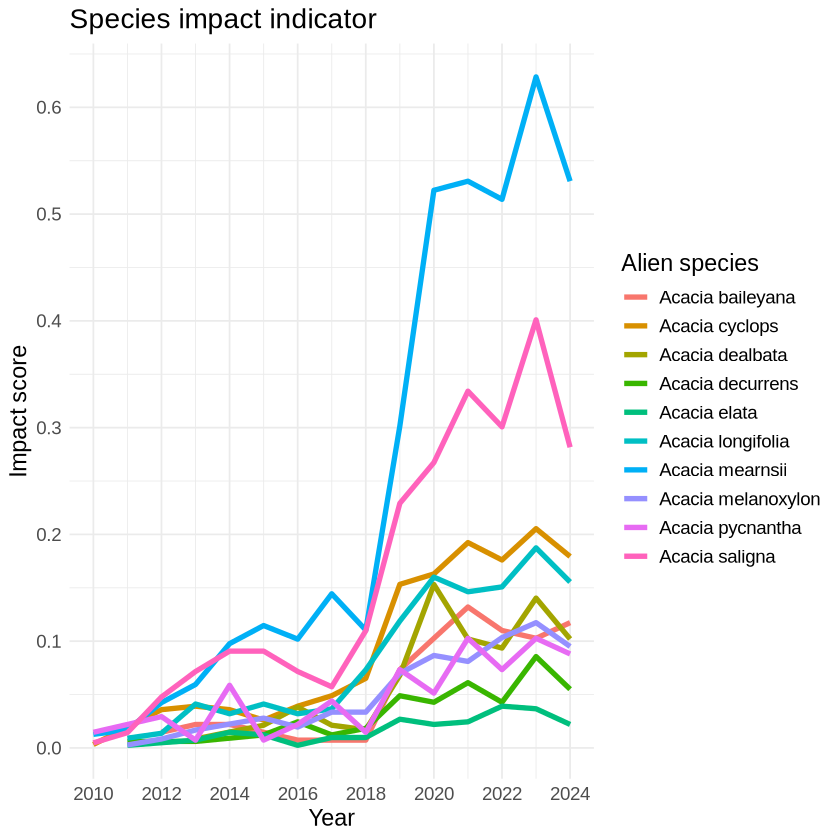

In [11]:
# Impact indicator per species
species_value <- compute_impact_per_species(
  cube = acacia_cube,
  impact_data = eicat_acacia,
  method = "mean"
)

# Visualise species impact
plot(species_value)